In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


locate the file in google drive

In [ ]:
path='drive/MyDrive/archive'

In [ ]:
# Importing Required Libraries
import cv2
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
#retrieve pathnames/files marching a specified pattern
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
#loko cal i yore mapol
from keras.preprocessing.image import ImageDataGenerator 

from tensorflow.keras.models import Model
%matplotlib inline 
#new comer
#from tensorflow.keras.layers import Dense
#didnt work
#from keras.layers import Activation, Dense
from keras.models import load_model

In [ ]:
pip install -q tflite-model-maker


     |████████████████████████████████| 642 kB 36.1 MB/s 
     |████████████████████████████████| 55.3 MB 1.1 MB/s 
     |████████████████████████████████| 1.2 MB 56.4 MB/s 
     |████████████████████████████████| 840 kB 65.2 MB/s 
     |████████████████████████████████| 128 kB 75.7 MB/s 
     |████████████████████████████████| 78 kB 6.1 MB/s 
     |████████████████████████████████| 10.9 MB 58.7 MB/s 
     |████████████████████████████████| 596 kB 59.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.4 MB/s 
     |████████████████████████████████| 87 kB 7.4 MB/s 
     |████████████████████████████████| 3.4 MB 43.9 MB/s 
     |████████████████████████████████| 238 kB 55.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 352 kB 64.9 MB/s 
     |████████████████████████████████| 99 kB 9.3 MB/s 
     |████████████████████████████████| 40 kB 5.5 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |█████████████████

In [ ]:
pip install libportaudio2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement libportaudio2 (from versions: none)
ERROR: No matching distribution found for libportaudio2


In [ ]:

assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader


Procesing and loading the images

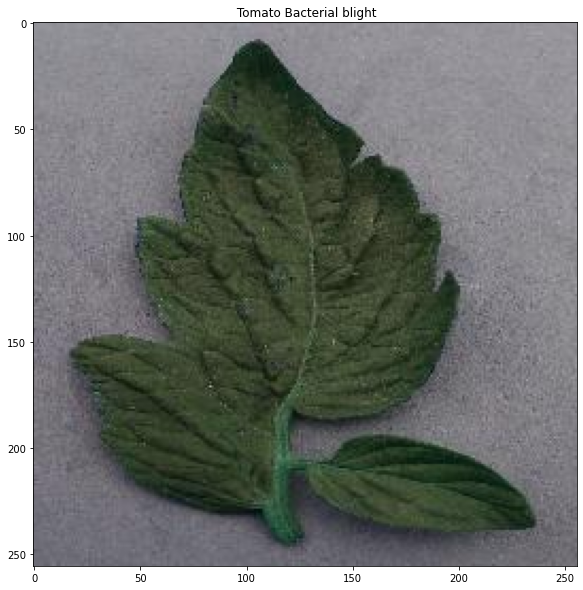

In [ ]:

image = cv2.imread('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
plt.figure(figsize=(10,10)) 
plt.title(' Tomato Bacterial blight')
plt.imshow(image)

#cv2.imshow(image)
#plt.imshow(numpy.real(image))
   #plt.show()

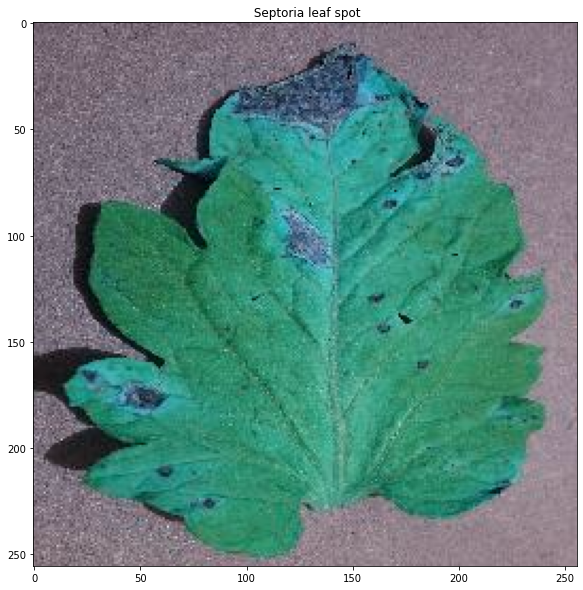

In [ ]:
image = cv2.imread('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot/0025c401-7785-49c5-8bef-780a8a0d3652___Matt.S_CG 2694.JPG')
plt.figure(figsize=(10,10)) 
plt.title(' Septoria leaf spot')
plt.imshow(image)

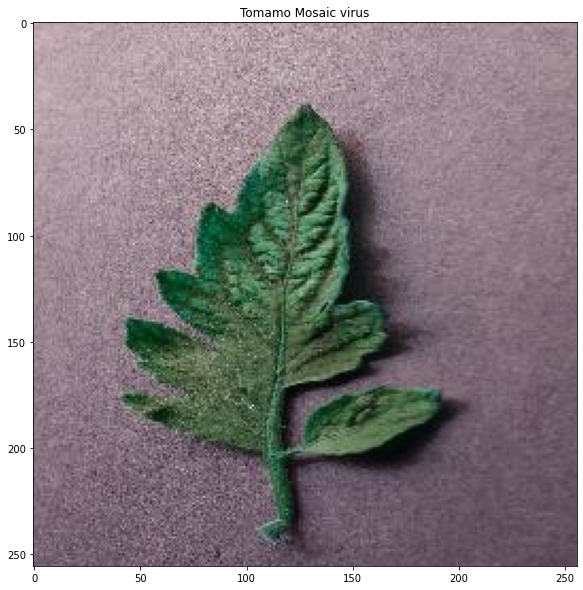

In [ ]:
image = cv2.imread('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG')
type(image)
plt.figure(figsize=(10,10)) 
plt.title('Tomamo Mosaic virus')
plt.imshow(image)

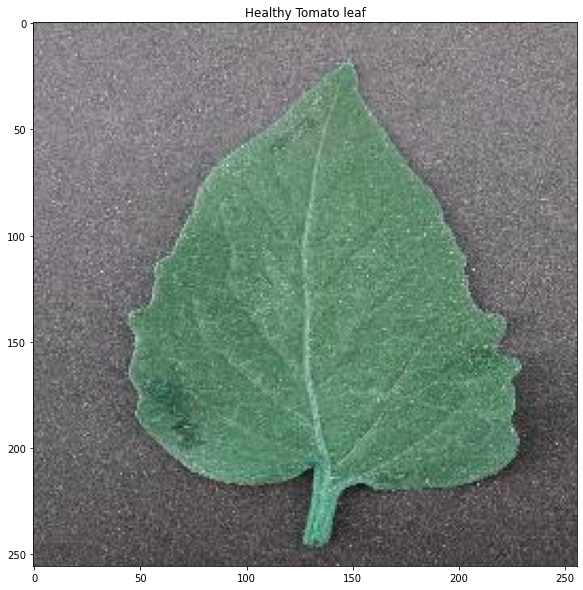

In [ ]:
image = cv2.imread('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/3181ca61-aaa0-4263-a141-2760d164f84b___GH_HL Leaf 189.1.JPG')
plt.figure(figsize=(10,10)) 
plt.title('Healthy Tomato leaf')
plt.imshow(image)

In [ ]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
train_data = train_datagenerator.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                  target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 18337 images belonging to 10 classes.
Found 18337 images belonging to 10 classes.


Able's CNN Model

In [ ]:
# CNN Model
cnn = tf.keras.models.Sequential()
# 1st Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[255,255,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# 2nd Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
# Compiling the CNN 
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training my  CNN on the Training set and evaluating it on the Test set 10 flipping times
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

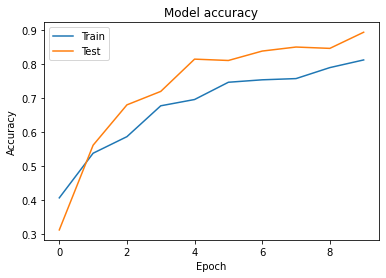

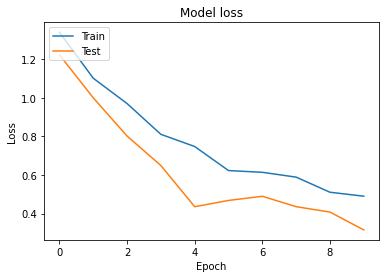

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
#I am using image_size [224, 224] to scale all the images to this size only. And the reason behind this size is that when VGG-16 was trained, Its used image size was [224,224].

#I am storing the VGG-16 model into a vgg variable with the imagenet weight. We want to cut the last layers of VGG-16 because the VGG-16 model was used to categorize thousand of images but in our problem statement, we are having only four categories.
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#input shape is +3 becausethe image has 3 channels RGB
#If you will notice one thing, you will find that I am using include_top=False because I don’t want to add the last layer. If you will use it as true It means that you are adding the last layers.
#i don't wanna use the first and the last layer

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')
#used to return all file paths that match a specific pattern

In [ ]:
 x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
#train and validating sets are labeled, test is unlabeled
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 18337 images belonging to 10 classes.


In [ ]:


test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 5942 images belonging to 10 classes.


In [ ]:
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/20
574/574 [==============================] - 437s 762ms/step - loss: 0.3178 - accuracy: 0.8935 - val_loss: 0.4161 - val_accuracy: 0.8692
Epoch 2/20
574/574 [==============================] - 284s 495ms/step - loss: 0.2544 - accuracy: 0.9129 - val_loss: 0.2177 - val_accuracy: 0.9263
Epoch 3/20
574/574 [==============================] - 280s 488ms/step - loss: 0.2144 - accuracy: 0.9283 - val_loss: 0.1885 - val_accuracy: 0.9366
Epoch 4/20
574/574 [==============================] - 284s 494ms/step - loss: 0.1743 - accuracy: 0.9404 - val_loss: 0.2276 - val_accuracy: 0.9286
Epoch 5/20
574/574 [==============================] - 283s 494ms/step - loss: 0.1683 - accuracy: 0.9451 - val_loss: 0.2475 - val_accuracy: 0.9251
Epoch 6/20
574/574 [==============================] - 284s 494ms/step - loss: 0.1609 - accuracy: 0.9454 - val_loss: 0.2086 - val_accuracy: 0.9413
Epoch 7/20
574/574 [==============================] - 285s 497ms/step - loss: 0.1679 - accuracy: 0.9454 - val_loss: 0.2281 -

In [ ]:
model.save('/content/drive/MyDrive/Alltomatoe/final.h5') 

In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/Alltomatoe/final.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("final.tflite", "wb").write(tflite_model)

59870260

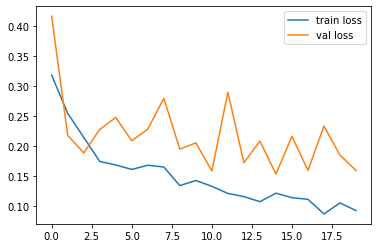

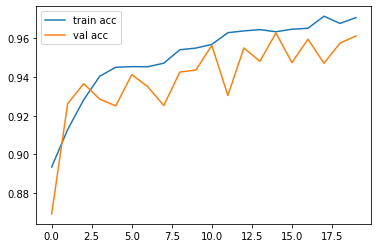

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

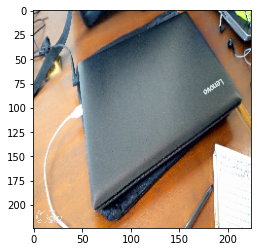

In [ ]:


#new 
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/IMG_20210513_125008_610.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
#conveerting image to np array
#converting a loaded image in PIL format into a NumPy array for use with deep learning model.
test_image = image.img_to_array(test_image)
test_image=test_image/256
#inserting an additional dimension in input Tensor
#Syntax: tensorflow.expand_dims( input, axis, name)
#Returns: It returns a Tensor with expanded dimension.

test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)



In [ ]:
preds

array([[0.0000000e+00, 2.3021085e-35, 1.6508866e-37, 2.7284346e-28,
        1.5348475e-33, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        8.6343639e-38, 1.0000000e+00]], dtype=float32)

In [ ]:

#argmax is a function which gives the index of the greatest number in the given row or column and the row or column can be decided using axis attribute of argmax funcion.
# If we give axis=0 then it will give the index from columns and if we give axis=1 then it will give the index from rows.
preds = np.argmax(preds, axis=1)
#returns indices of the max element of the array in a particular axis.


In [ ]:

if preds==0:
  print("Tomato___Bacterial_spot")
elif preds==1:
  print("Tomato___Early_blight")
elif preds==2:
  print("Tomato___Late_blight")
elif preds==3:
  print("Tomato___Septoria_leaf_spot")
elif preds==4:
  print("Tomato___Spider_mites Two-spotted_spider_mite") 
elif preds==5:
  print("Tomato___Target_Spot")  
elif preds==6:
  print("Tomato___Tomato_Yellow_Leaf_Curl_Virus") 
elif preds==7:
  print("Tomato___Tomato_mosaic_virus")
elif preds==8:
  print("Tomato___healthy")          
elif preds==9:
  print("The leaf is not a tomatoe leaf")



The leaf is not a tomatoe leaf
